# Image Segmentation

## 1-1 고양이 사진

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

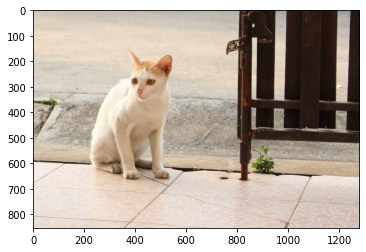

In [2]:
img_cat = './image/test.png'
img_orig1 = cv2.imread(img_cat)
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
model_file = "./model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file)

('./model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7e22830503a0>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_cat)

In [7]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

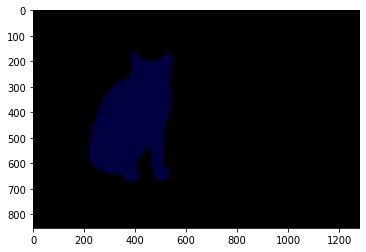

In [8]:
plt.imshow(output)
plt.show()

In [9]:
segvalues

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [10]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


- background와 cat으로 잘 분류함!

In [11]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype = int)
for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [12]:
colormap[LABEL_NAMES.index('cat')]

array([64,  0,  0])

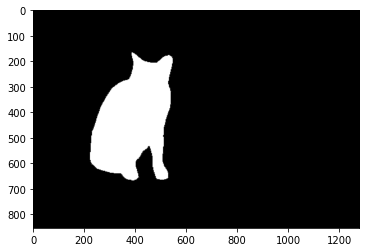

In [13]:
seg_color = (0, 0, 64) # colormap > BGR 변환
seg_map = np.all(output == seg_color, axis = -1)
plt.imshow(seg_map, cmap = 'gray')
plt.show()

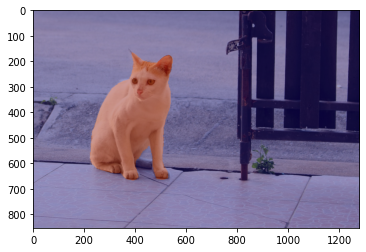

In [14]:
img_show = img_orig1.copy()
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

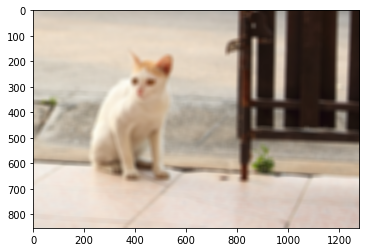

In [15]:
img_orig1_blur = cv2.blur(img_orig1, (20, 20))
plt.imshow(cv2.cvtColor(img_orig1_blur, cv2.COLOR_BGR2RGB))
plt.show()

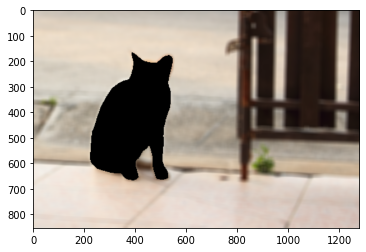

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig1_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()


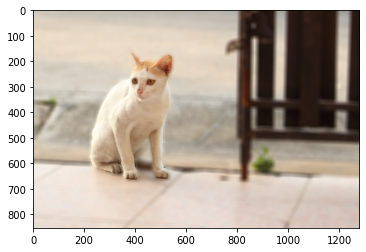

In [17]:
img_concat = np.where(img_mask_color == 255, img_orig1, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

- 고양이 사진은 잘 되는듯 하다!

## 1-2 강아지  사진 

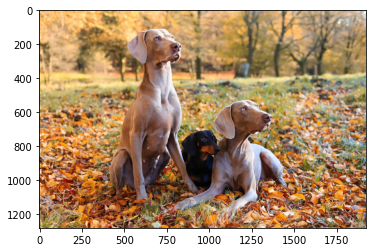

In [18]:
img_path = "./image/two_dogs.png"
img_orig = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

- 강아지가 두마리인 줄 알았는데, 사실 세마리였다.

In [19]:
# 모델은 이전에 불러온 것과 동일한 모델 사용.
segvalues, output = model.segmentAsPascalvoc(img_path)

In [20]:
# segvalues로 사진에 포함된 객체 확인
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


- 강아지와 배경만 잘 잡아냈다!

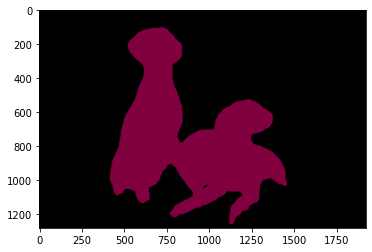

In [21]:
# segmentation 결과 확인
plt.imshow(output)
plt.show()

- 얼핏 잘 보이지 않던 가운데 강아지 모습까지도 잘 잡아냈다!
- 세마리 모두 잘 분류된 것으로 확인됨 

In [22]:
# 'dog' 클래스의 colormap 확인
colormap[LABEL_NAMES.index('dog')]

array([ 64,   0, 128])

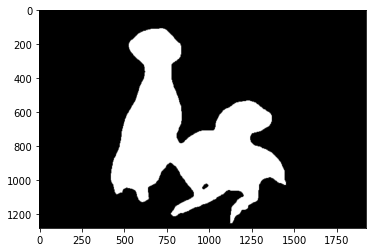

In [23]:
# 강아지 객체만 분류
seg_color = (128, 0, 64) # 'dog'클래스 컬러맵 RGB > BGR 변환
seg_map = np.all(output == seg_color, axis = -1) # seg_color와 동일한 값만 True 처리
plt.imshow(seg_map, cmap = 'gray')
plt.show()

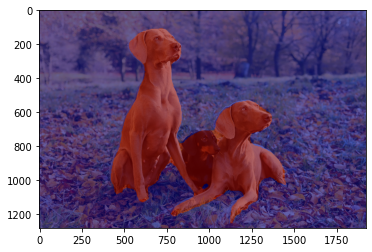

In [24]:
# 이미지 마스크 확인
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8)*255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.4, color_mask, 0.6, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 마스킹이 잘 수행된 것으로 보임!

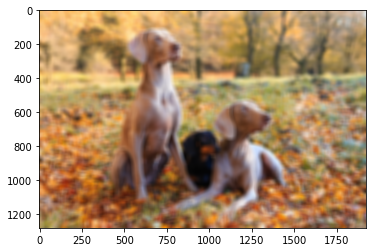

In [25]:
# 원본 이미지 블러처리
img_blur = img_orig.copy()
img_blur = cv2.blur(img_blur, (30, 30))
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

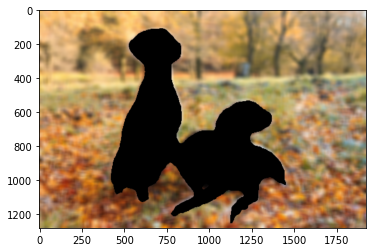

In [26]:
# background mask 만들기
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_mask = cv2.bitwise_and(img_bg_mask, img_blur)
plt.imshow(cv2.cvtColor(img_bg_mask, cv2.COLOR_BGR2RGB))
plt.show()

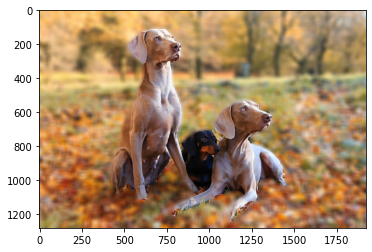

In [27]:
# img_bg_mask로 원본 이미지와 결합하기
img_result = np.where(img_mask_color == 255, img_orig, img_blur)
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.show()

- 결과는 잘 나온 듯 하나, 오른쪽 강아지의 경우 앞발이 낙엽에 가려져 있어서 발 일부가 동일한 객체 클래스로 분류되지 못함 

## 1-3 배경색과 비슷한 사람 이미지 사진 분류하기

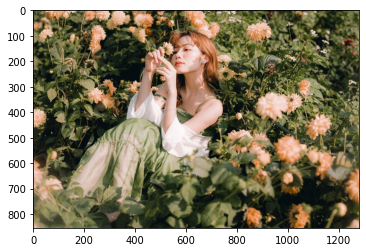

In [28]:
# 이미지 불러오기
img_path = "./image/person.png"
img_orig = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

- 배경색과 비슷한 옷을 입고 있는 인물 사진임

In [29]:
# 모델에서 segvalues, output 추출하기
segvalues, output = model.segmentAsPascalvoc(img_path)

In [30]:
# 분류 객체 확인하기
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
pottedplant


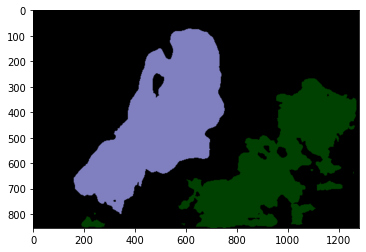

In [31]:
# segmentation 결과 확인하기
plt.imshow(output)
plt.show()

- 사람은 분류를 잘 했지만, 식물은 분류를 잘 하지 못한 것 같음
- 아마도 배경이 전체 식물로 뒤덮여 있어서 그런 듯 함
- 하지만 사람만 추출하는 것이 목표이니 식물은 제외할 예정임

In [32]:
# 'person' class의 colormap 확인
colormap[LABEL_NAMES.index('person')]

array([192, 128, 128])

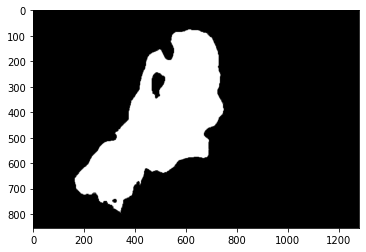

In [33]:
# 'person'클래스만 추출하기
seg_color = (128, 128, 192)
seg_map = np.all(output == seg_color, axis = -1)
plt.imshow(seg_map, cmap = 'gray')
plt.show()

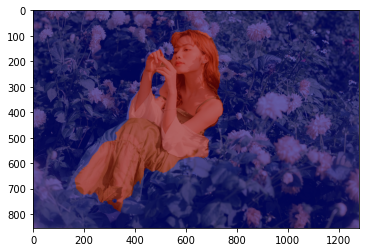

In [34]:
# 이미지 마스크 확인
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8)*255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.4, color_mask, 0.6, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 치마랑 옷 아래 그림자 진 부분 마스킹이 잘 안된듯

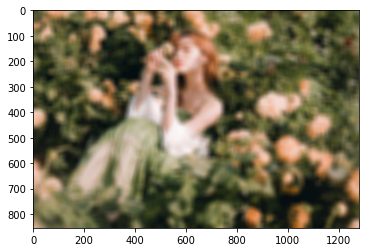

In [35]:
# 원본 이미지 블러처리
img_blur = img_orig.copy()
img_blur = cv2.blur(img_blur, (25, 25))
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

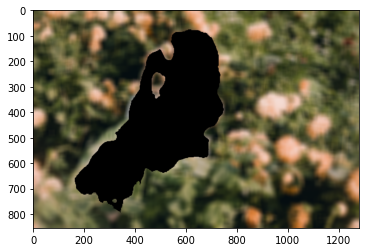

In [36]:
# 블러 이미지에서 img_mask 빼기
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_mask = cv2.bitwise_and(img_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_mask, cv2.COLOR_BGR2RGB))
plt.show()

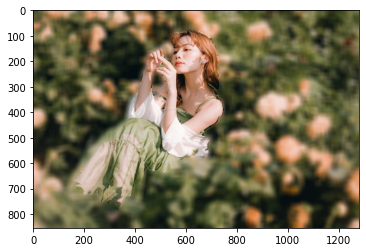

In [37]:
# 이미지 결합
img_result_person = np.where(img_mask_color == 255, img_orig, img_blur)
plt.imshow(cv2.cvtColor(img_result_person, cv2.COLOR_BGR2RGB))
plt.show()

## 1-4 결론 

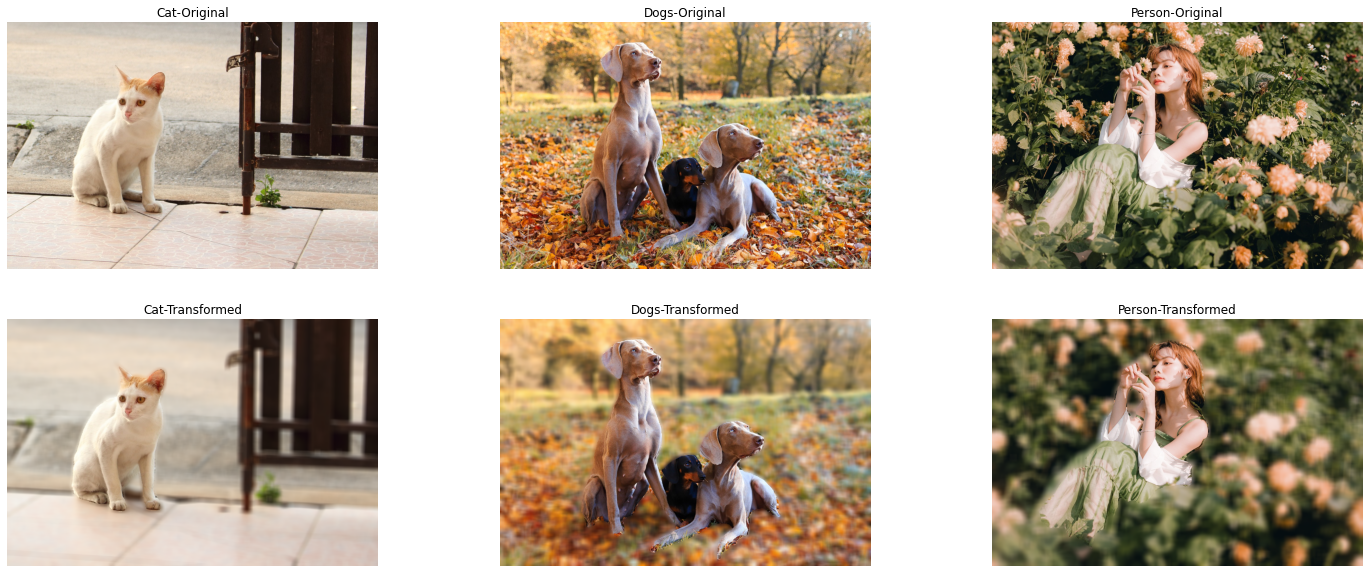

In [52]:
fig, ax = plt.subplots(2, 3, figsize = (25, 10))

ax[0][0].imshow(cv2.cvtColor(cv2.imread(img_cat), cv2.COLOR_BGR2RGB))
ax[0][0].axis("off")
ax[0][0].set_title("Cat-Original")

ax[0][1].imshow(cv2.cvtColor(cv2.imread("./image/two_dogs.png"), cv2.COLOR_BGR2RGB))
ax[0][1].axis("off")
ax[0][1].set_title("Dogs-Original")

ax[0][2].imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
ax[0][2].axis("off")
ax[0][2].set_title("Person-Original")


ax[1][0].imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
ax[1][0].axis("off")
ax[1][0].set_title("Cat-Transformed")

ax[1][1].imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
ax[1][1].axis("off")
ax[1][1].set_title("Dogs-Transformed")

ax[1][2].imshow(cv2.cvtColor(img_result_person, cv2.COLOR_BGR2RGB))
ax[1][2].axis("off")
ax[1][2].set_title("Person-Transformed")

plt.show()

**결과 및 한계점**
- 결과물 자체는 세가지 이미지 모두 잘 나온 것 같지만, 디테일한 부분에서 퀄리티가 떨어지는 것 같음
- 강아지 사진에서 오른쪽 강아지의 앞발이 낙엽에 가려져 있어서 발 일부가 동일한 객체 클래스로 분류되지 못하였고, 함께 블러처리 되어버림
- 인물 사진에서는 모델이 배경과 비슷한 색상의 옷을 입고 있어서 옷의 영역 외곽선 부분이 일부 'person' 클래스로 분류되지 못함
- 인물 사진에서 전체 배경이 식물로 되어있으나, 일부만 pottedplant 클래스로 분류되어 있었음  

**한계점 보완을 위한 솔루션**
- 주로 경계에서 문제가 발생하는 듯 함 -> 경계 정교화 작업 필요
    - Object Segmentation 의 SOTA 모델 사용 ([SAM2](https://ai.meta.com/sam2/))
    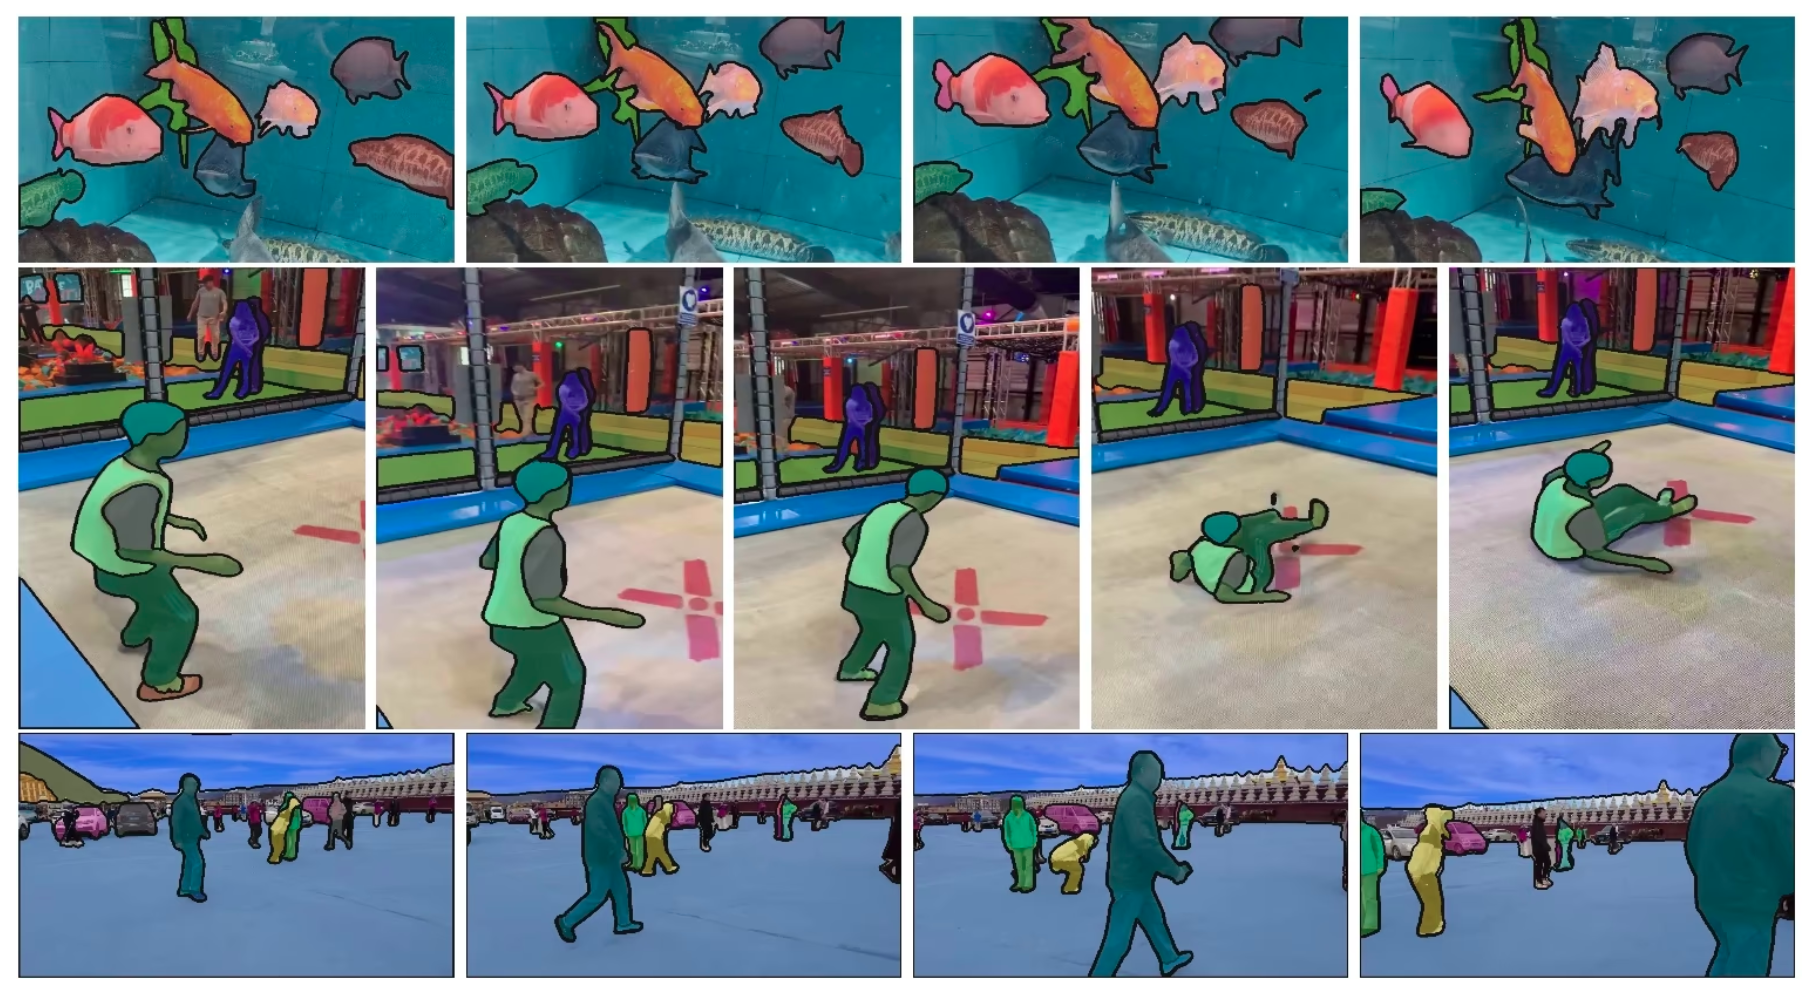
    

# 2. 크로마키 이미지 합성
- 고양이 사진을 포도밭에 합성하기

In [39]:
# 고양이 이미지만 추출하기
img_path_cat= "./image/test.png"
segvalues, output = model.segmentAsPascalvoc(img_path_cat)

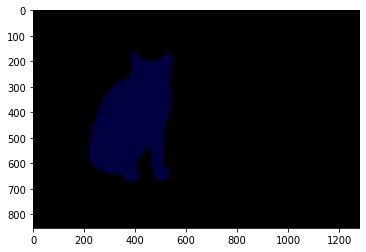

In [40]:
plt.imshow(output)

In [41]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [42]:
colormap[LABEL_NAMES.index('cat')]

array([64,  0,  0])

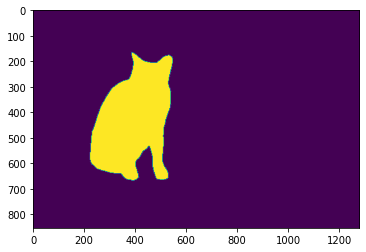

In [43]:
seg_color = (0, 0, 64)
seg_map = np.all(output == seg_color, axis = -1)
plt.imshow(seg_map)
plt.show()

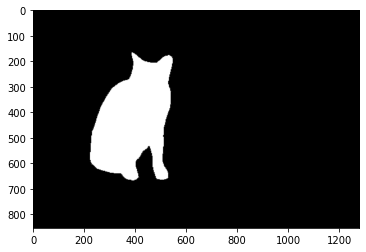

In [44]:
img_mask = seg_map.astype(np.uint8)*255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
plt.imshow(img_mask_color)
plt.show()

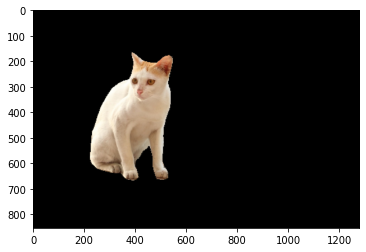

In [45]:
img_orig_cat = cv2.imread(img_path_cat)
img_cat_sticker = np.where(img_mask_color == 255, img_orig_cat, 0)
plt.imshow(cv2.cvtColor(img_cat_sticker, cv2.COLOR_BGR2RGB))
plt.show()

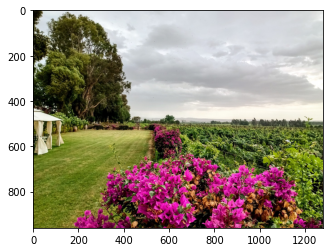

In [46]:
# 배경사진 로드
img_path_bg = "./image/background.png"
img_bg = cv2.imread(img_path_bg)
plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.show()

In [47]:
# 고양이 사진과 이미지 크기 동일하게 맞추기
img_orig_cat.shape

(853, 1280, 3)

In [48]:
img_bg.shape

(960, 1280, 3)

In [49]:
img_bg_resized = cv2.resize(img_bg, (1280, 853))
img_bg_resized.shape

(853, 1280, 3)

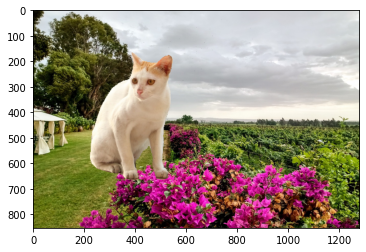

In [54]:
result = np.where(img_mask_color == 0, img_bg_resized, img_orig_cat)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

- 어쨌거나 성공,,, 거대한 고양이가 되어버렸다.